# Feature Scaling - Utkarsh Gaikwad

1. Standardisation
2. Min Max Scaler
3. Unit Vector

### 1. Standardiasation 

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
numerical_cols = list(df.columns[(df.dtypes=='float64') | (df.dtypes=='int64')])
numerical_cols

['total_bill', 'tip', 'size']

In [6]:
mean_bill = df['total_bill'].mean()
std_bill = df['total_bill'].std()
print(f'Mean total bill : {mean_bill:.2f}')
print(f'Std dev total bill : {std_bill:.2f}')

Mean total bill : 19.79
Std dev total bill : 8.90


In [7]:
df['total_bill_standardised'] = (df['total_bill'] - mean_bill)/std_bill

In [8]:
df['total_bill_standardised'].mean()

-6.028875031263658e-17

In [9]:
df['total_bill_standardised'].std()

1.0

In [10]:
df[['total_bill','total_bill_standardised']]

,total_bill,total_bill_standardised
0,16.99,-0.314066
1,10.34,-1.061054
2,21.01,0.137497
3,23.68,0.437416
4,24.59,0.539635
...,...,...
239,29.03,1.038377
240,27.18,0.830568
241,22.67,0.323964
242,17.82,-0.220833


<AxesSubplot: xlabel='total_bill', ylabel='Count'>

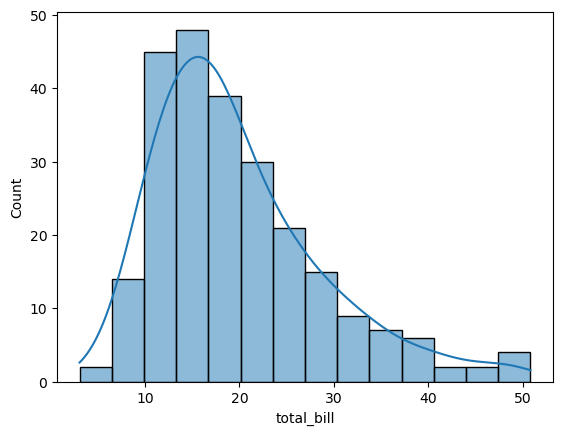

In [11]:
sns.histplot(df['total_bill'],kde=True)

<AxesSubplot: xlabel='total_bill_standardised', ylabel='Count'>

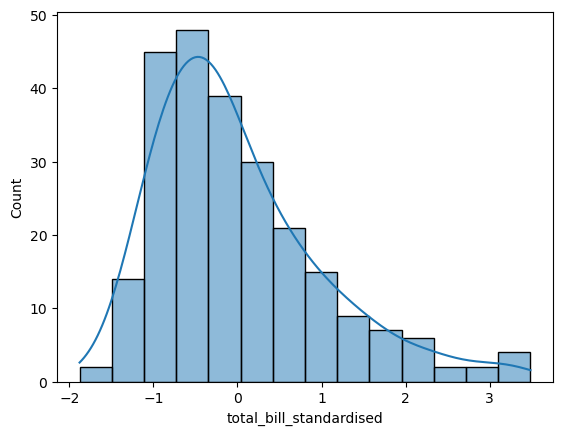

In [12]:
sns.histplot(df['total_bill_standardised'],kde=True)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler

StandardScaler()

In [17]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [18]:
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [24]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns = ['total_bill_standardised','tip_standardised'])

,total_bill_standardised,tip_standardised
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [25]:
scaler.transform([[13,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

### 2. Min Max Scaler

In [26]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max

MinMaxScaler()

In [35]:
numeric_columns = list(df.columns[(df.dtypes=='float64')|(df.dtypes=='int64')])
numeric_columns

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

In [36]:
df_scaled = pd.DataFrame(min_max.fit_transform(df[numeric_columns]),columns=numeric_columns)

In [37]:
df_scaled.head()

,passengers,distance,fare,tip,tolls,total
0,0.166667,0.043597,0.040268,0.064759,0.0,0.067139
1,0.166667,0.021526,0.026846,0.000000,0.0,0.046104
2,0.166667,0.037330,0.043624,0.071084,0.0,0.074112
3,0.166667,0.209809,0.174497,0.185241,0.0,0.205452
4,0.500000,0.058856,0.053691,0.033133,0.0,0.069733


In [38]:
min_max.transform([[3,7,30,10,0,40]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.5       , 0.19073569, 0.19463087, 0.30120482, 0.        ,
        0.22302905]])

### 3. Unit Vector Scaling

In [39]:
from sklearn.preprocessing import normalize

In [40]:
df_vector = pd.DataFrame(normalize(df[numeric_columns]),columns=numeric_columns)

In [41]:
df_vector.head()

,passengers,distance,fare,tip,tolls,total
0,0.066684,0.106694,0.466786,0.143370,0.0,0.863554
1,0.094025,0.074279,0.470123,0.000000,0.0,0.874429
2,0.061406,0.084126,0.460546,0.144918,0.0,0.869510
3,0.021357,0.164448,0.576637,0.131345,0.0,0.789138
4,0.180764,0.130150,0.542291,0.066280,0.0,0.807411
